# Cars Prices prediction:

## The goal of this project is to develop a predictive model that 
## can accurately forecast the prices of cars based on various input parameters

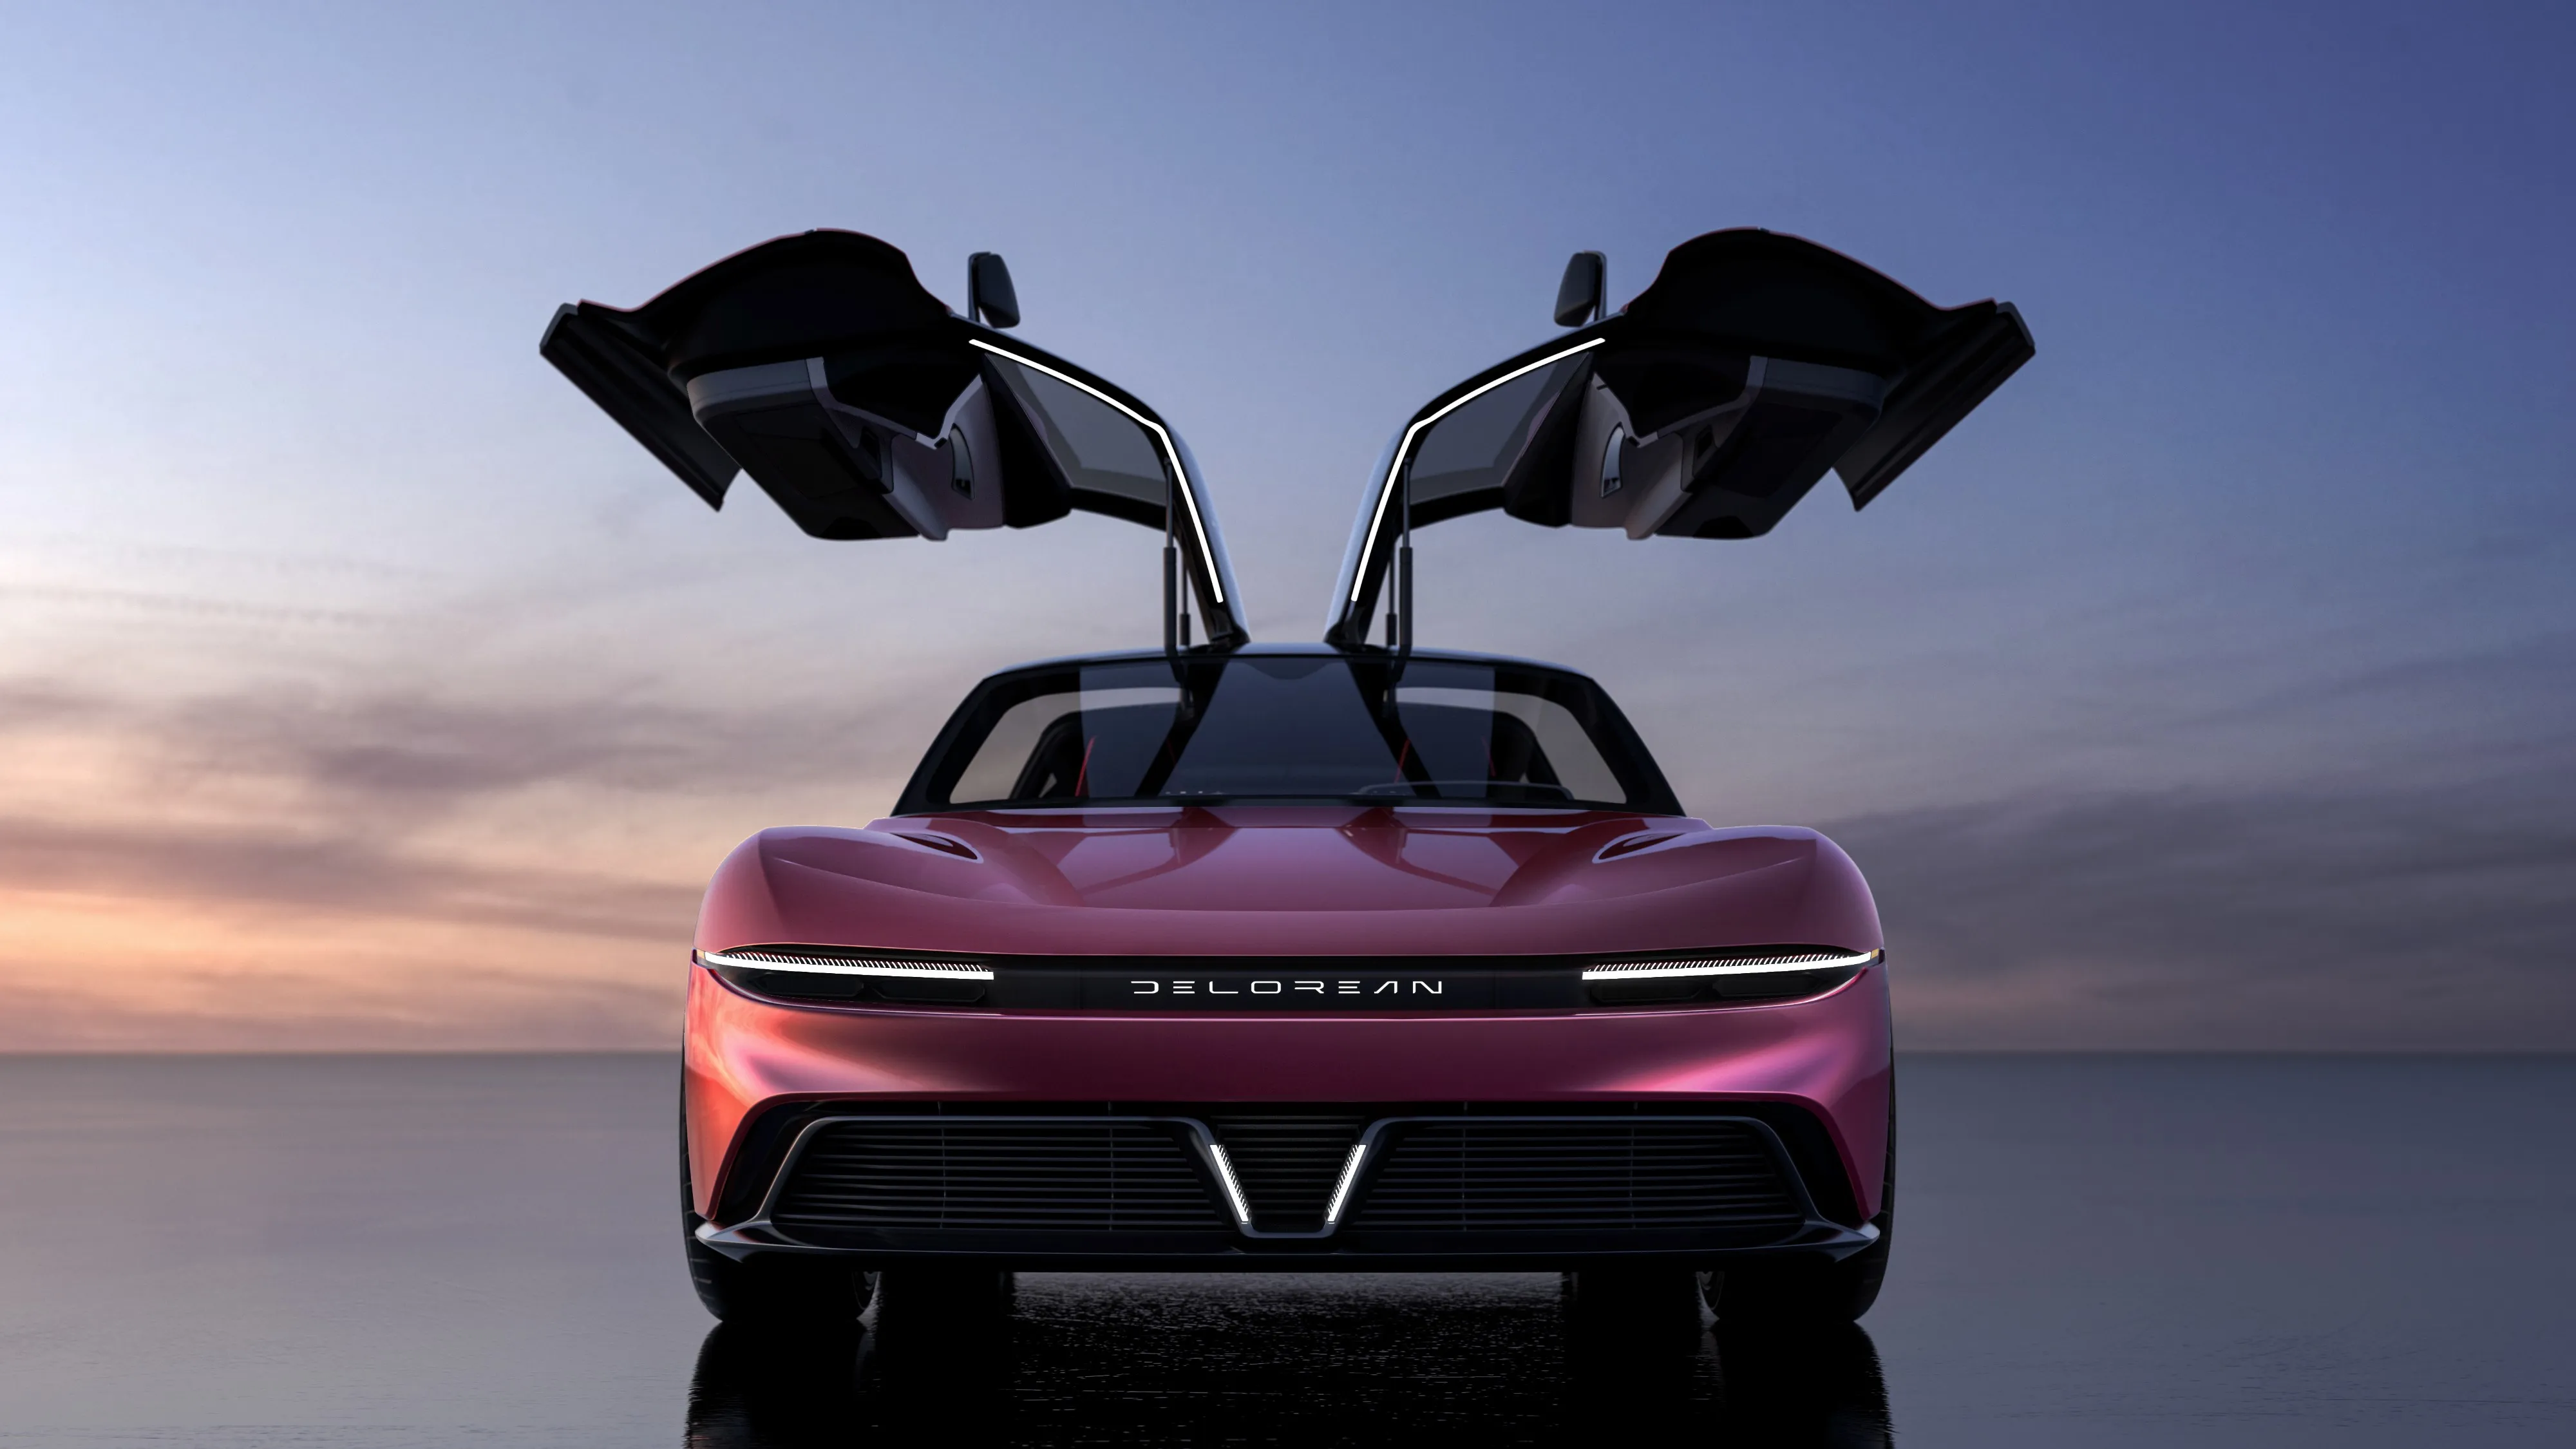

# libraries

In [91]:
import pandas as pd


import numpy as pn

import matplotlib.pyplot as plt
import seaborn as ses
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')


In [92]:
data=pd.read_csv(r'CarPrice_Assignment.csv')


# Explore Data

In [93]:
data.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [94]:
data.shape

(205, 26)

In [95]:
data.sample(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
171,172,2,toyota corolla,gas,std,two,hatchback,rwd,front,98.4,...,146,mpfi,3.62,3.50,9.3,116,4800,24,30,11549.0
83,84,3,mitsubishi g4,gas,turbo,two,hatchback,fwd,front,95.9,...,156,spdi,3.59,3.86,7.0,145,5000,19,24,14869.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
82,83,3,mitsubishi outlander,gas,turbo,two,hatchback,fwd,front,95.9,...,156,spdi,3.58,3.86,7.0,145,5000,19,24,12629.0
109,110,0,peugeot 504 (sw),gas,std,four,wagon,rwd,front,114.2,...,120,mpfi,3.46,3.19,8.4,97,5000,19,24,12440.0


In [96]:
data.fueltype.unique()

array(['gas', 'diesel'], dtype=object)

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

<Axes: >

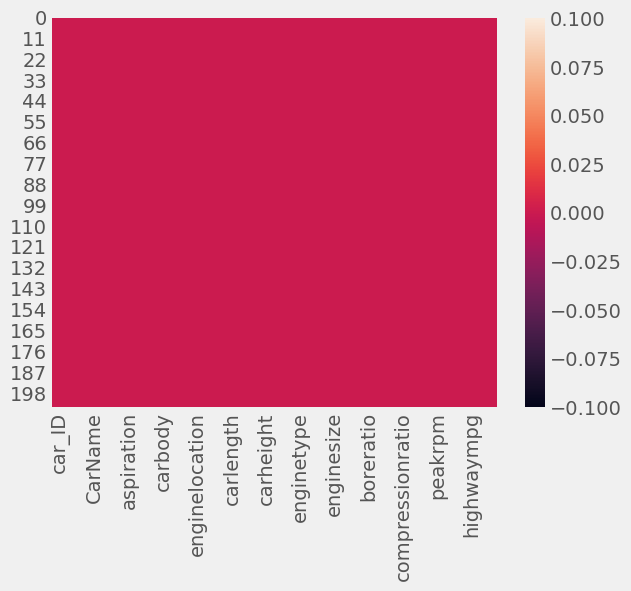

In [98]:
data.isnull().sum()
ses.heatmap(data.isnull())

In [99]:
data.duplicated().sum()

0

In [100]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [101]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [102]:
data.size

5330

# 2-Analysis

In [103]:
data['price'].nunique()

189

In [104]:
for nq in data.columns:
    print(nq,':',data[nq].nunique())
    

car_ID : 205
symboling : 6
CarName : 147
fueltype : 2
aspiration : 2
doornumber : 2
carbody : 5
drivewheel : 3
enginelocation : 2
wheelbase : 53
carlength : 75
carwidth : 44
carheight : 49
curbweight : 171
enginetype : 7
cylindernumber : 7
enginesize : 44
fuelsystem : 8
boreratio : 38
stroke : 37
compressionratio : 32
horsepower : 59
peakrpm : 23
citympg : 29
highwaympg : 30
price : 189


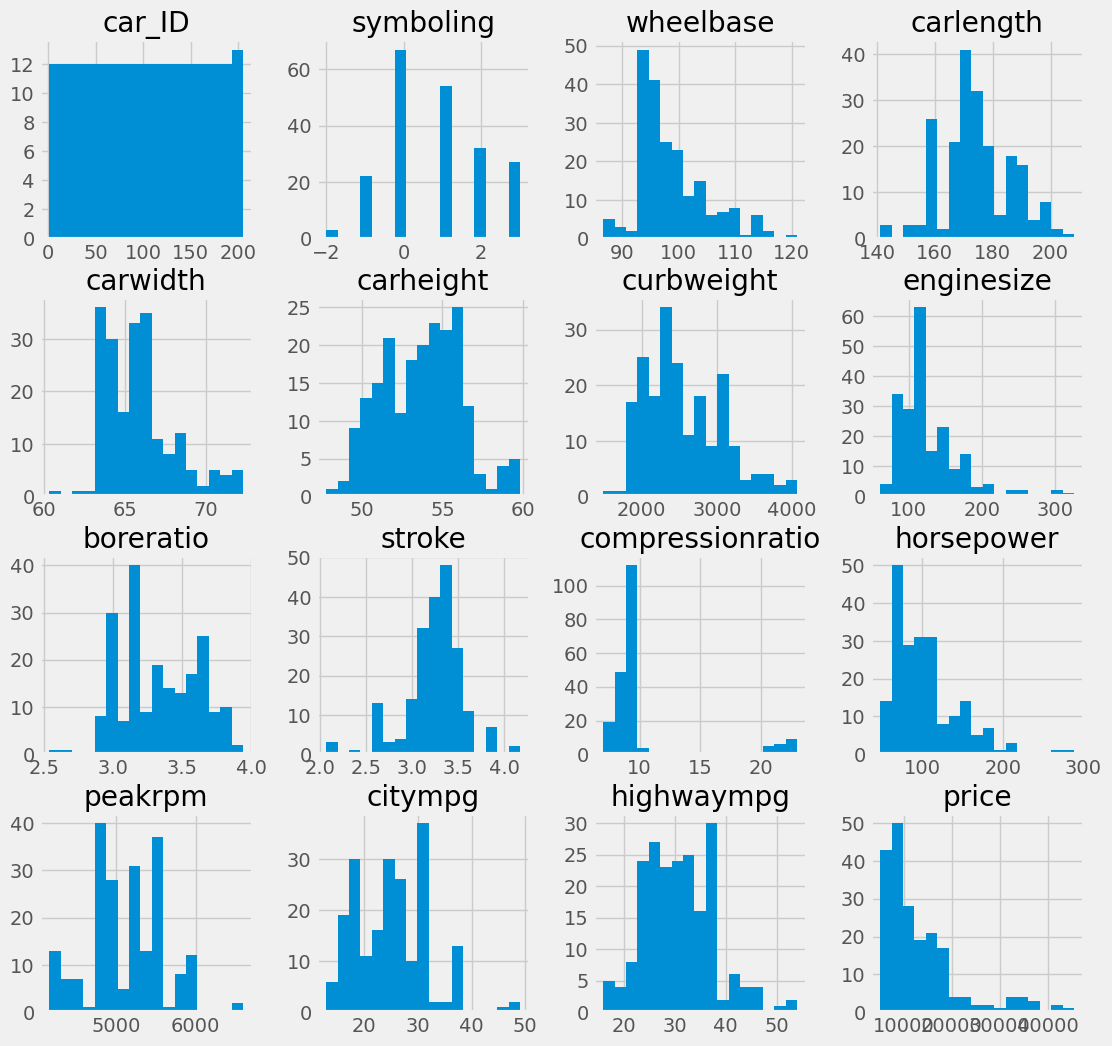

In [105]:
data.hist(bins=17,figsize=(12,12))
plt.show
plt.style.use('ggplot')

##### type15cars

In [106]:
 type5cars =data['CarName'].sort_values(ascending=True).value_counts()[:5]

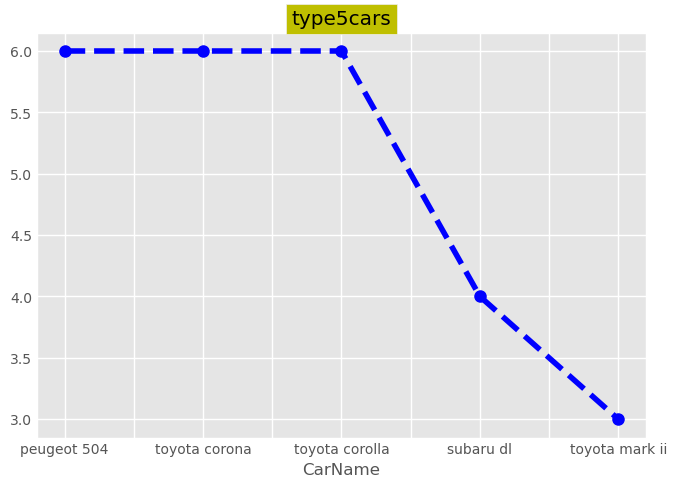

In [107]:
type5cars.plot(figsize=(7,5),marker='o',markersize=8,linewidth=4,c='b',linestyle='dashed')
plt.title('type5cars',bbox={'facecolor':'y'})
plt.style.use('ggplot')

In [108]:
top5price=([data[data['CarName']==i]['price'].mean() for i in list(type5cars.index)])  
top5price

[15435.833333333334, 9366.333333333334, 9530.0, 8590.75, 9148.0]

Text(0.5, 1.0, 'type and price 5 cars')

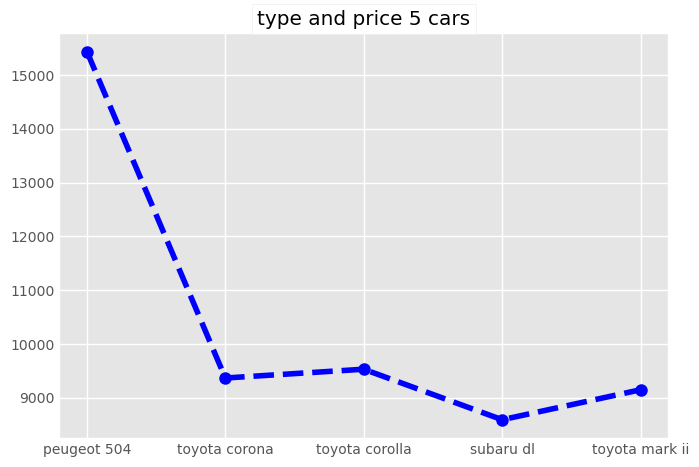

In [109]:
plt.figure(figsize=(7,5))
plt.plot(type5cars.index,top5price,marker='o',markersize=8,linewidth=4,c='b',linestyle='dashed')
plt.title('type and price 5 cars',bbox={'facecolor':'w'})


In [110]:
data_object=data.select_dtypes(include='object')

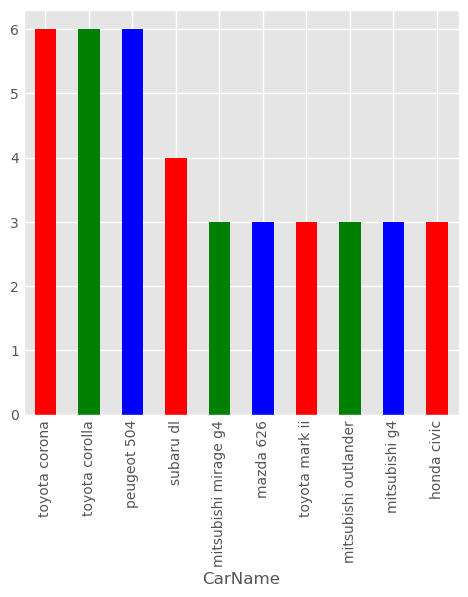

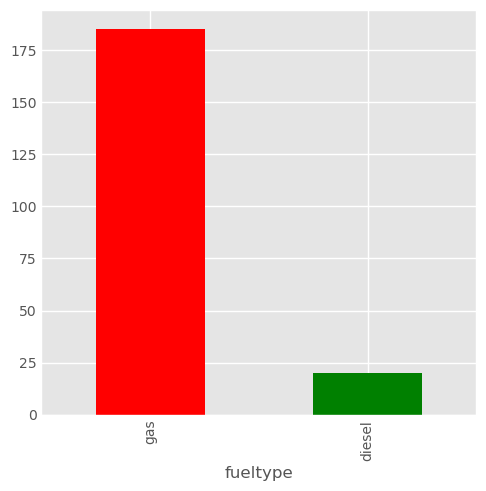

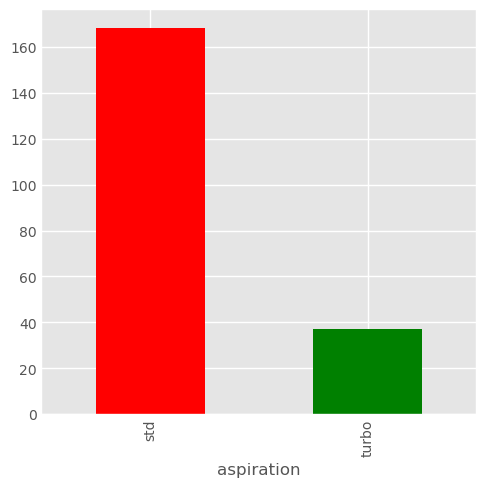

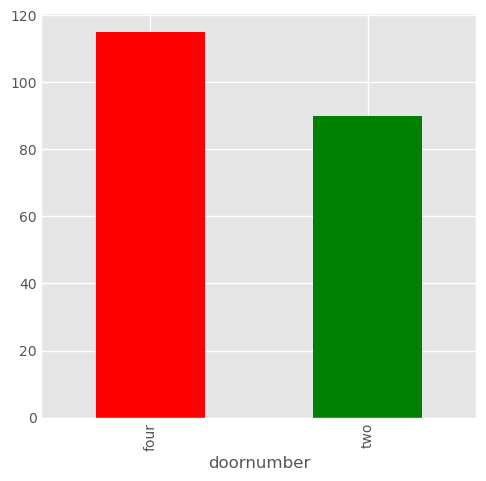

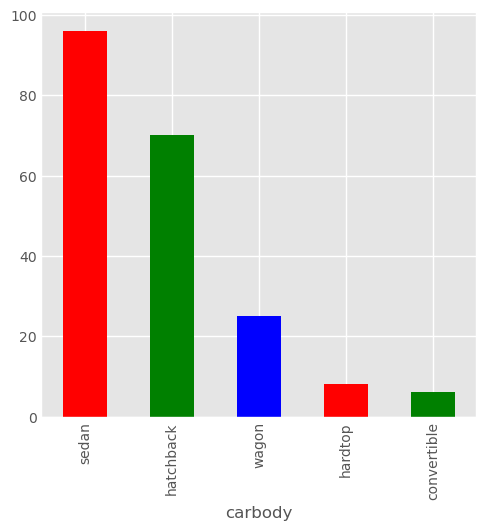

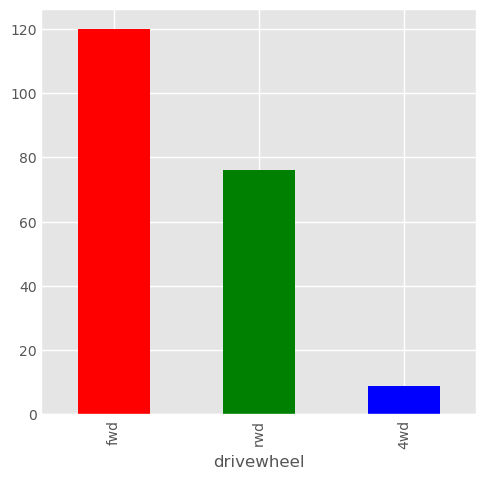

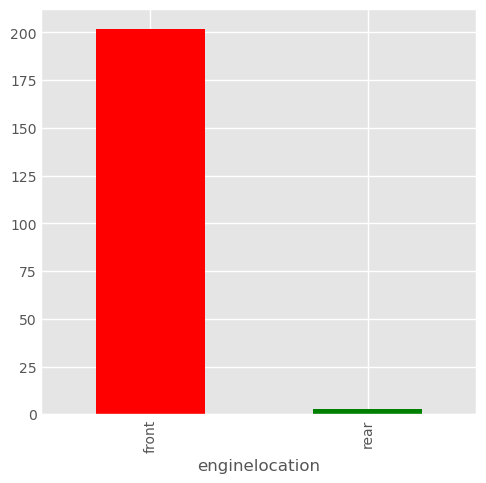

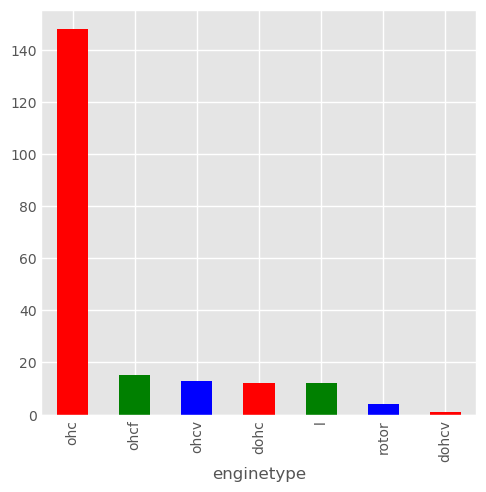

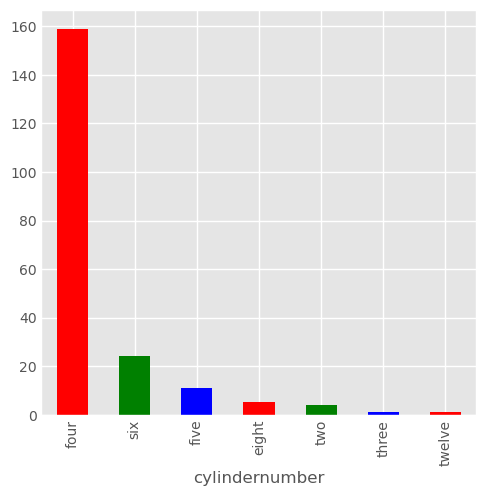

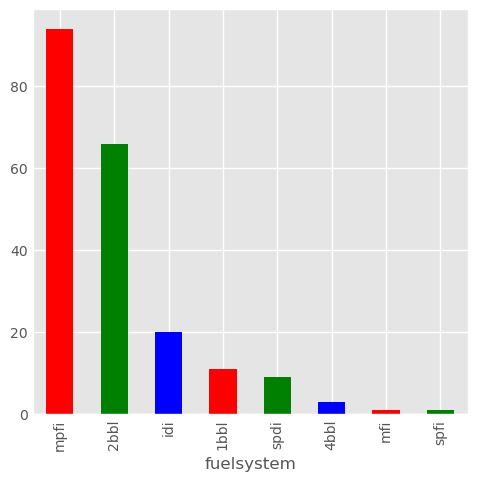

In [111]:
for t in data_object:
    plt.figure(figsize=(5,5))
    top10=data[t].value_counts()[:10]
    c=['red','green','blue']
    top10.plot(kind='bar',color=c)
    
    

## process data

In [112]:
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [113]:
#change data.object to number
from sklearn.preprocessing import LabelEncoder 
la=LabelEncoder()
data1=data.select_dtypes(include='object')
data2=data.select_dtypes(exclude='object')
for i in range (0,data1.shape[1]):
    data1.iloc[:,i]=la.fit_transform(data1.iloc[:,i])
    


In [114]:
data=pd.concat([data1,data2],axis=1)

In [115]:
data.select_dtypes(['object'])

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,2,1,0,1,0,2,0,0,2,5
1,3,1,0,1,0,2,0,0,2,5
2,1,1,0,1,2,2,0,5,3,5
3,4,1,0,0,3,1,0,3,2,5
4,5,1,0,0,3,0,0,3,1,5
...,...,...,...,...,...,...,...,...,...,...
200,139,1,0,0,3,2,0,3,2,5
201,138,1,1,0,3,2,0,3,2,5
202,140,1,0,0,3,2,0,5,3,5
203,142,0,1,0,3,2,0,3,3,3


In [116]:
data.drivewheel.unique()

array([2, 1, 0], dtype=object)

<Axes: >

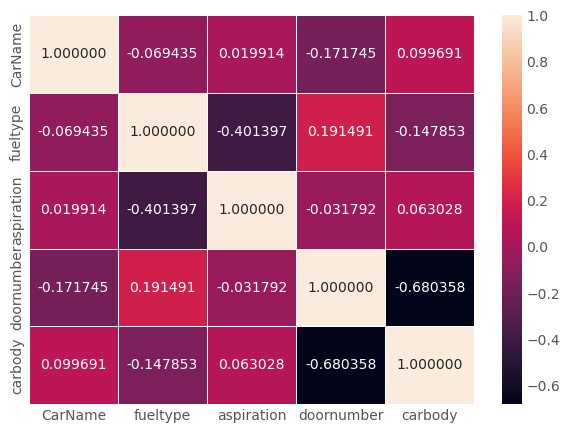

In [117]:
cor=data.corr( ).iloc[:5,:5]
ses.heatmap(cor,fmt='5f',annot=True,lw=.5)

# creat model

In [118]:
x=data.drop(['price'],axis=1)
y=data.price

In [119]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [120]:
accuracy=[]

In [121]:
def models (model):
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    r2=r2_score(y_test,pre)
    #accuracy=accuracy_score(y_test,pre)
    print('r2 is',r2)
    accuracy.append(r2)

In [122]:
model=GradientBoostingRegressor()
model2=RandomForestRegressor()
model3= RandomForestRegressor()

In [123]:
accuracy=[]

In [124]:
algro=[GradientBoostingRegressor(),RandomForestRegressor(),RandomForestRegressor()]

In [125]:
models(model)
models(model)
models(model)


r2 is 0.9367563778271493
r2 is 0.9382957326143893
r2 is 0.937894513741028


In [126]:
new=pd.DataFrame({'algrothem':algro,'accuracyes':accuracy},index=algro)

In [127]:
new

,algrothem,accuracyes
GradientBoostingRegressor(),GradientBoostingRegressor(),0.936756
RandomForestRegressor(),RandomForestRegressor(),0.938296
RandomForestRegressor(),RandomForestRegressor(),0.937895


<Axes: >

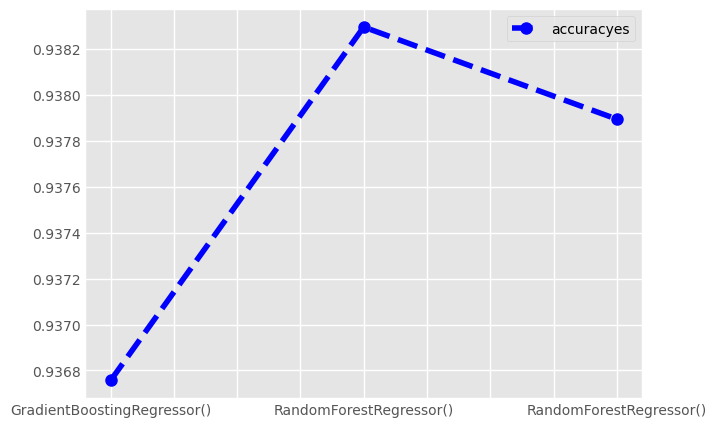

In [128]:
new.plot(marker='o',markersize=8,linewidth=4,c='b',linestyle='dashed')

In [129]:
data

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,2,1,0,1,0,2,0,0,2,5,...,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,0,1,0,2,0,0,2,5,...,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,0,1,2,2,0,5,3,5,...,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,1,0,0,3,1,0,3,2,5,...,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,1,0,0,3,0,0,3,1,5,...,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,139,1,0,0,3,2,0,3,2,5,...,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,138,1,1,0,3,2,0,3,2,5,...,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,140,1,0,0,3,2,0,5,3,5,...,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,142,0,1,0,3,2,0,3,3,3,...,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


# USING MODEL TO PREDICT NEW DATA

In [130]:
data.drop(['aspiration','enginesize','fuelsystem','car_ID' ,'symboling','doornumber','wheelbase' ,'carlength','boreratio' ,'stroke','compressionratio' ,'horsepower' ,'peakrpm' ,'citympg' ,'highwaympg','carwidth','curbweight',"carheight"],axis=1,inplace=True)

In [131]:
data

,CarName,fueltype,carbody,drivewheel,enginelocation,enginetype,cylindernumber,price
0,2,1,0,2,0,0,2,13495.0
1,3,1,0,2,0,0,2,16500.0
2,1,1,2,2,0,5,3,16500.0
3,4,1,3,1,0,3,2,13950.0
4,5,1,3,0,0,3,1,17450.0
...,...,...,...,...,...,...,...,...
200,139,1,3,2,0,3,2,16845.0
201,138,1,3,2,0,3,2,19045.0
202,140,1,3,2,0,5,3,21485.0
203,142,0,3,2,0,3,3,22470.0


In [132]:
data.to_csv('carrr.csv',index=False)

In [133]:
import pickle

In [173]:
y='cars.sav'

In [174]:
pickle.dump(model2,open(y,'wb'))

# outler

In [ ]:
data_numeric=data.select_dtypes(exclude='object')

In [ ]:
for col in data_numeric:    
    g=data[col].quantile(.25)
    k=data[col].quantile(.75)
    iqr=k-g
    low=g-iqr*1.5
    high=k+iqr*1.5
    outlier=((data[col]>low)|(data[col]<high)).sum()
    total=data[col].shape[0]
    print(f"total outliers {col} are : {outlier}----{round(100*(outlier)/total,2)}%")
    if outlier>0:
     data=data.loc[(data[col]<=high) & (data[col]>=low)]
    

In [ ]:
data.head(8)